# Gerekli Modüllerin eklenmesi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from evds import evdsAPI
import datetime
import scipy

# Bugüne kadar olan verilerin alınabilmesi için dün ve bugünün datetime objesi olarak oluşturulması

In [2]:
today_raw = datetime.datetime.now()
today = today_raw.strftime("%d-%m-%Y")

yesterday = today_raw - datetime.timedelta(days = 1)

# Merkez Bankası Elektronik Veri Dağıtım Sistemi (EVDS) verilerinin çekilmesi

In [3]:
def get_cbrt_data(cbrt_series):

    evds = evdsAPI('7YsQt28SEO')

    evds_series = cbrt_series

    start_date = "11-03-2020"

    end_date = yesterday.strftime("%d-%m-%Y")

    end_month = yesterday.strftime("%Y-%m")

    # print(end_month)

    temp_cbrt_data = evds.get_data(evds_series,
    startdate=start_date,
    enddate=end_date,
    #formulas=[0,0,0],
    )

    return temp_cbrt_data

### Günlük Veriler

In [4]:
daily_series = ["TP.DK.USD.S.YTL", "TP.DK.EUR.S.YTL", "TP.MK.F.BILESIK", "TP.BISTTLREF.ORAN"]
daily_data = get_cbrt_data(daily_series)

daily_data['Tarih'] = pd.to_datetime(daily_data['Tarih'], format="%d-%m-%Y")
daily_data = daily_data.reset_index()
daily_data = daily_data.drop(["index"], axis=1)
# daily_data = daily_data.fillna(method='ffill') #For filling NaN rows with previous values
daily_data.set_index('Tarih', inplace=True)

daily_data.rename(columns={'TP_DK_USD_S_YTL':'Dolar/TL', "TP_DK_EUR_S_YTL":"Euro/TL","TP_MK_F_BILESIK":"BIST100Kapanis", "TP_BISTTLREF_ORAN":"TLGecelikReferansFaizi"}, inplace=True)

daily_data.loc["2020-07-27":]["BIST100Kapanis"] = daily_data.loc["2020-07-27":]["BIST100Kapanis"] * 100 # 27 Haziran 2020 Tarihinde BIST Endekslerinden İki Sıfır Atılmıştır

daily_data

D:\Anaconda3\envs\newenv\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Dolar/TL,Euro/TL,BIST100Kapanis,TLGecelikReferansFaizi
Tarih,,,,
2020-03-11,6.1261,6.9580,100966.27,10.9831
2020-03-12,6.1613,6.9795,93639.50,10.8384
2020-03-13,6.2376,7.0265,95605.22,10.7272
2020-03-16,6.2824,7.0226,87888.34,10.7680
2020-03-17,6.3743,7.1271,86777.69,10.6449
2020-03-18,6.4644,7.1693,85576.61,9.6274
2020-03-19,6.4628,7.0999,85195.39,9.8419
2020-03-20,6.5271,7.0678,85795.79,9.9349
2020-03-23,6.4956,6.9863,84246.17,9.9738


### Haftalık Veriler

In [5]:
weekly_series = ["TP.AB.C1", "TP.KKHARTUT.KT1", "TP.KREDI.L001"]
weekly_data = get_cbrt_data(weekly_series)

weekly_data['Tarih'] = pd.to_datetime(weekly_data['Tarih'], format="%d-%m-%Y")
weekly_data = weekly_data.reset_index()
weekly_data = weekly_data.drop(["index"], axis=1)
weekly_data = weekly_data.fillna(method='ffill') #For filling NaN rows with previous values
weekly_data.set_index('Tarih', inplace=True)

weekly_data.rename(columns={'TP_AB_C1':'AltinRezervi',"TP_KKHARTUT_KT1":"KartHarcamaTutari", "TP_KREDI_L001":"HaftalikKredi"}, inplace=True)

weekly_data

,YEARWEEK,AltinRezervi,KartHarcamaTutari,HaftalikKredi
Tarih,,,,
2020-03-13,2020-11,31690.0,21272308.0,2.708517e+09
2020-03-20,2020-12,28304.0,19568916.0,2.749744e+09
2020-03-27,2020-13,31325.0,13497929.0,2.768395e+09
2020-04-03,2020-14,31306.0,14123457.0,2.807290e+09
2020-04-10,2020-15,32871.0,13488741.0,2.833365e+09
2020-04-17,2020-16,33958.0,15236343.0,2.899083e+09
2020-04-24,2020-17,33785.0,12965924.0,2.954655e+09
2020-05-01,2020-18,34785.0,15262968.0,2.998581e+09
2020-05-08,2020-19,34683.0,16558922.0,3.047473e+09


### Aylık Veriler (Haftalık veri türüne dönüştürüldü)

In [6]:
monthly_series = ["TP.TIG04", "TP.ODEMGZS.GTOPLAM", "TP.FG.J0", "TP.KB.GID001", "TP.AKONUTSAT1.TOPLAM"]
monthly_data = get_cbrt_data(monthly_series)

monthly_data['Tarih'] = pd.to_datetime(monthly_data['Tarih'], format="%Y-%m")
monthly_data = monthly_data.reset_index()
monthly_data = monthly_data.drop(["index"], axis=1)
monthly_data = monthly_data.fillna(method='ffill') #For filling NaN rows with previous values
monthly_data.set_index('Tarih', inplace=True)

monthly_data.rename(columns={'TP_TIG04':'IssizSayisi',"TP_ODEMGZS_GTOPLAM":"ZiyaretciSayisi", "TP_FG_J0":"TUFE", "TP_KB_GID001":"MerkeziYonetimButceGideri", "TP_AKONUTSAT1_TOPLAM":"KonutSatisi"}, inplace=True)

monthly_data_resampled = monthly_data.asfreq(freq='MS', method='ffill', how="first")

monthly_data_resampled = monthly_data_resampled.asfreq(freq='W-FRI', method='ffill')
monthly_data_resampled /= monthly_data_resampled.groupby(monthly_data_resampled.index.strftime('%Y-%m-%d')).transform('count')
monthly_data_resampled = monthly_data_resampled.loc["2020-03-13":]

monthly_data

,IssizSayisi,ZiyaretciSayisi,TUFE,MerkeziYonetimButceGideri,KonutSatisi
Tarih,,,,,
2020-03-01,3971.0,906067.0,450.58,91161877.0,108670.0
2020-04-01,3775.0,50630.0,454.43,108443227.0,42783.0
2020-05-01,3826.0,51588.0,460.62,85446203.0,50936.0
2020-06-01,3826.0,128861.0,465.84,85642670.0,190012.0
2020-07-01,3826.0,128861.0,468.56,116225366.0,229357.0
2020-08-01,3826.0,128861.0,472.61,116225366.0,229357.0


# Covid-19 Verilerinin Çekilmesi (Kaynak: John Hopkins Üniversitesi - Github)

In [7]:
case_path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

case_data = pd.read_csv(case_path,index_col=False)

case_data = case_data.drop(["Province/State","Lat","Long"], axis=1)
case_data.set_index("Country/Region",inplace =True)
case_data = case_data.stack()
case_data = case_data.reset_index()
case_data.rename(columns={'level_1':'Tarih',0:"VakaSayisi"}, inplace=True)
case_data['Tarih'] = pd.to_datetime(case_data['Tarih'])
case_data = case_data[(case_data['Country/Region']=='Turkey') & (case_data['Tarih']>'2020-03-10')]
case_data = case_data.reset_index()
case_data = case_data.drop(["index"], axis=1)
case_data = case_data.drop(['Country/Region'], axis=1)
case_data.set_index("Tarih",inplace =True)

case_data

,VakaSayisi
Tarih,
2020-03-11,1
2020-03-12,1
2020-03-13,5
2020-03-14,5
2020-03-15,6
2020-03-16,18
2020-03-17,47
2020-03-18,98
2020-03-19,192


### Günlük Covid Vaka Verilerinin ikinci bir değişkene kopyalanması

In [8]:
daily_case_data = case_data
daily_case_data

,VakaSayisi
Tarih,
2020-03-11,1
2020-03-12,1
2020-03-13,5
2020-03-14,5
2020-03-15,6
2020-03-16,18
2020-03-17,47
2020-03-18,98
2020-03-19,192


### Haftalık Covid Vaka Verilerinin Günlük Verilerden türetilmesi

In [9]:
weekly_case_data = case_data.resample('W-FRI').mean() #weekly
weekly_case_data

,VakaSayisi
Tarih,
2020-03-13,2.333333
2020-03-20,103.571429
2020-03-27,2438.142857
2020-04-03,13673.142857
2020-04-10,34695.142857
2020-04-17,65344.857143
2020-04-24,94368.857143
2020-05-01,115000.285714
2020-05-08,129800.571429


## Ölüm Verileri

In [10]:
death_path = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

death_data = pd.read_csv(death_path,index_col=False)

death_data = death_data.drop(["Province/State","Lat","Long"], axis=1)
death_data.set_index("Country/Region",inplace =True)
death_data = death_data.stack()
death_data = death_data.reset_index()
death_data.rename(columns={'level_1':'Tarih',0:"VefatSayisi"}, inplace=True)
death_data['Tarih'] = pd.to_datetime(death_data['Tarih'])
death_data = death_data[(death_data["Country/Region"] == "Turkey") & (death_data['Tarih']>'2020-03-10')]
death_data = death_data.reset_index()
death_data = death_data.drop(["index"], axis=1)
death_data = death_data.drop(['Country/Region'], axis=1)
death_data.set_index("Tarih",inplace =True)

death_data

,VefatSayisi
Tarih,
2020-03-11,0
2020-03-12,0
2020-03-13,0
2020-03-14,0
2020-03-15,0
2020-03-16,0
2020-03-17,1
2020-03-18,1
2020-03-19,3


### Günlük Covid Vefat Verilerinin ikinci bir değişkene kopyalanması

In [11]:
daily_death_data = death_data
daily_death_data

,VefatSayisi
Tarih,
2020-03-11,0
2020-03-12,0
2020-03-13,0
2020-03-14,0
2020-03-15,0
2020-03-16,0
2020-03-17,1
2020-03-18,1
2020-03-19,3


### Haftalık Covid Vefat Verilerinin Günlük Verilerden türetilmesi

In [12]:
weekly_death_data = death_data.resample('W-FRI').mean() #weekly
weekly_death_data

,VefatSayisi
Tarih,
2020-03-13,0.000000
2020-03-20,1.285714
2020-03-27,49.428571
2020-04-03,239.857143
2020-04-10,739.285714
2020-04-17,1418.285714
2020-04-24,2253.285714
2020-05-01,2988.000000
2020-05-08,3518.285714


# Günlük Covid ve EVDS Verilerinin birleştirilmesi

### Vaka & EVDS

In [13]:
daily_merged_case_data = pd.concat([daily_case_data, daily_data[daily_data.columns[0:]]], axis=1)
daily_merged_case_data = daily_merged_case_data.fillna(method='ffill') #For filling NaN rows with previous values
daily_merged_case_data

,VakaSayisi,Dolar/TL,Euro/TL,BIST100Kapanis,TLGecelikReferansFaizi
Tarih,,,,,
2020-03-11,1,6.1261,6.9580,100966.27,10.9831
2020-03-12,1,6.1613,6.9795,93639.50,10.8384
2020-03-13,5,6.2376,7.0265,95605.22,10.7272
2020-03-14,5,6.2376,7.0265,95605.22,10.7272
2020-03-15,6,6.2376,7.0265,95605.22,10.7272
2020-03-16,18,6.2824,7.0226,87888.34,10.7680
2020-03-17,47,6.3743,7.1271,86777.69,10.6449
2020-03-18,98,6.4644,7.1693,85576.61,9.6274
2020-03-19,192,6.4628,7.0999,85195.39,9.8419


### Vefat & EVDS

In [14]:
daily_merged_death_data = pd.concat([daily_death_data, daily_data[daily_data.columns[0:]]], axis=1)
daily_merged_death_data = daily_merged_death_data.fillna(method='ffill') #For filling NaN rows with previous values
daily_merged_death_data

,VefatSayisi,Dolar/TL,Euro/TL,BIST100Kapanis,TLGecelikReferansFaizi
Tarih,,,,,
2020-03-11,0,6.1261,6.9580,100966.27,10.9831
2020-03-12,0,6.1613,6.9795,93639.50,10.8384
2020-03-13,0,6.2376,7.0265,95605.22,10.7272
2020-03-14,0,6.2376,7.0265,95605.22,10.7272
2020-03-15,0,6.2376,7.0265,95605.22,10.7272
2020-03-16,0,6.2824,7.0226,87888.34,10.7680
2020-03-17,1,6.3743,7.1271,86777.69,10.6449
2020-03-18,1,6.4644,7.1693,85576.61,9.6274
2020-03-19,3,6.4628,7.0999,85195.39,9.8419


## Haftalık Covid ve EVDS Verilerinin birleştirilmesi

### Vaka & EVDS

In [15]:
weekly_merged_case_data = pd.concat([weekly_case_data, weekly_data[weekly_data.columns[1:]]], axis=1)

weekly_merged_case_data = pd.concat([weekly_merged_case_data, monthly_data_resampled[monthly_data_resampled.columns[1:]]], axis=1)
weekly_merged_case_data = weekly_merged_case_data.loc[:"2020-07-31"]

weekly_merged_case_data

,VakaSayisi,AltinRezervi,KartHarcamaTutari,HaftalikKredi,ZiyaretciSayisi,TUFE,MerkeziYonetimButceGideri,KonutSatisi
Tarih,,,,,,,,
2020-03-13,2.333333,31690.0,21272308.0,2.708517e+09,906067.0,450.58,91161877.0,108670.0
2020-03-20,103.571429,28304.0,19568916.0,2.749744e+09,906067.0,450.58,91161877.0,108670.0
2020-03-27,2438.142857,31325.0,13497929.0,2.768395e+09,906067.0,450.58,91161877.0,108670.0
2020-04-03,13673.142857,31306.0,14123457.0,2.807290e+09,50630.0,454.43,108443227.0,42783.0
2020-04-10,34695.142857,32871.0,13488741.0,2.833365e+09,50630.0,454.43,108443227.0,42783.0
2020-04-17,65344.857143,33958.0,15236343.0,2.899083e+09,50630.0,454.43,108443227.0,42783.0
2020-04-24,94368.857143,33785.0,12965924.0,2.954655e+09,50630.0,454.43,108443227.0,42783.0
2020-05-01,115000.285714,34785.0,15262968.0,2.998581e+09,51588.0,460.62,85446203.0,50936.0
2020-05-08,129800.571429,34683.0,16558922.0,3.047473e+09,51588.0,460.62,85446203.0,50936.0


### Vefat & EVDS

In [16]:
weekly_merged_death_data = pd.concat([weekly_death_data, weekly_data[weekly_data.columns[1:]]], axis=1)

weekly_merged_death_data = pd.concat([weekly_merged_death_data, monthly_data_resampled[monthly_data_resampled.columns[1:]]], axis=1)
weekly_merged_death_data = weekly_merged_death_data.loc[:"2020-07-31"]

weekly_merged_death_data

,VefatSayisi,AltinRezervi,KartHarcamaTutari,HaftalikKredi,ZiyaretciSayisi,TUFE,MerkeziYonetimButceGideri,KonutSatisi
Tarih,,,,,,,,
2020-03-13,0.000000,31690.0,21272308.0,2.708517e+09,906067.0,450.58,91161877.0,108670.0
2020-03-20,1.285714,28304.0,19568916.0,2.749744e+09,906067.0,450.58,91161877.0,108670.0
2020-03-27,49.428571,31325.0,13497929.0,2.768395e+09,906067.0,450.58,91161877.0,108670.0
2020-04-03,239.857143,31306.0,14123457.0,2.807290e+09,50630.0,454.43,108443227.0,42783.0
2020-04-10,739.285714,32871.0,13488741.0,2.833365e+09,50630.0,454.43,108443227.0,42783.0
2020-04-17,1418.285714,33958.0,15236343.0,2.899083e+09,50630.0,454.43,108443227.0,42783.0
2020-04-24,2253.285714,33785.0,12965924.0,2.954655e+09,50630.0,454.43,108443227.0,42783.0
2020-05-01,2988.000000,34785.0,15262968.0,2.998581e+09,51588.0,460.62,85446203.0,50936.0
2020-05-08,3518.285714,34683.0,16558922.0,3.047473e+09,51588.0,460.62,85446203.0,50936.0


# Örnek Grafikler

## Günlük Vaka Grafiği

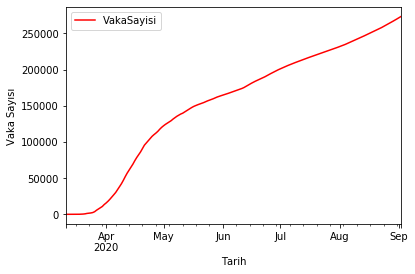

In [17]:
case_plot = plt.gca()
daily_merged_case_data.plot(kind='line', y='VakaSayisi', color='red', ax=case_plot, use_index=True)
case_plot.set_xlabel("Tarih")
case_plot.set_ylabel("Vaka Sayısı")
case_plot

## Günlük Vefat Grafiği

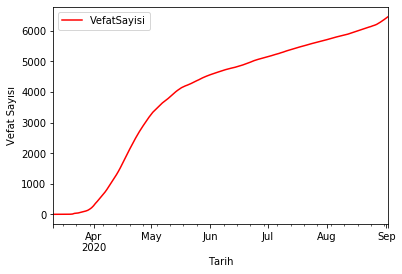

In [18]:
death_plot = plt.gca()
daily_merged_death_data.plot(kind='line', y='VefatSayisi', color='red', ax=death_plot, use_index=True)
death_plot.set_xlabel("Tarih")
death_plot.set_ylabel("Vefat Sayısı")
death_plot

## Kur Grafiği

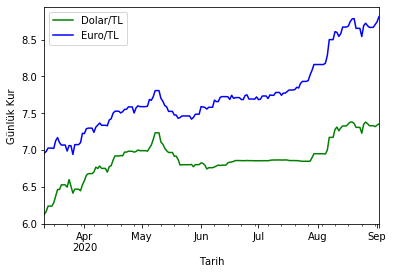

In [19]:
cbrt_plot = plt.gca()
daily_merged_case_data.plot(kind='line', y="Dolar/TL", color='green', ax=cbrt_plot, use_index=True)
daily_merged_case_data.plot(kind='line', y="Euro/TL", color='blue', ax=cbrt_plot, use_index=True)
cbrt_plot.set_xlabel("Tarih")
cbrt_plot.set_ylabel("Günlük Kur")
cbrt_plot

# Normal Testi

In [20]:
# Kolmogorov Smirnov Test
# alpha = 0.05
def normal_test(df):
    alpha = 5e-2
    print(alpha)
    for column in df.columns:
        k2, p = scipy.stats.normaltest(df['{}'.format(column)])
        if p < alpha:  # null hypothesis: x comes from a normal distribution
            print("Column {} :\tNon-Normal Distribution".format(column))
        else:
            print("Column {} :\tNormal Distribution".format(column))

### Vaka & EVDS

In [21]:
normal_test(daily_merged_case_data)

0.05
Column VakaSayisi :	Non-Normal Distribution
Column Dolar/TL :	Normal Distribution
Column Euro/TL :	Non-Normal Distribution
Column BIST100Kapanis :	Non-Normal Distribution
Column TLGecelikReferansFaizi :	Non-Normal Distribution


In [22]:
normal_test(weekly_merged_case_data)

0.05
Column VakaSayisi :	Normal Distribution
Column AltinRezervi :	Normal Distribution
Column KartHarcamaTutari :	Normal Distribution
Column HaftalikKredi :	Normal Distribution
Column ZiyaretciSayisi :	Non-Normal Distribution
Column TUFE :	Normal Distribution
Column MerkeziYonetimButceGideri :	Non-Normal Distribution
Column KonutSatisi :	Non-Normal Distribution


### Vefat & EVDS

In [23]:
normal_test(daily_merged_death_data)

0.05
Column VefatSayisi :	Non-Normal Distribution
Column Dolar/TL :	Normal Distribution
Column Euro/TL :	Non-Normal Distribution
Column BIST100Kapanis :	Non-Normal Distribution
Column TLGecelikReferansFaizi :	Non-Normal Distribution


In [24]:
normal_test(weekly_merged_death_data)

0.05
Column VefatSayisi :	Normal Distribution
Column AltinRezervi :	Normal Distribution
Column KartHarcamaTutari :	Normal Distribution
Column HaftalikKredi :	Normal Distribution
Column ZiyaretciSayisi :	Non-Normal Distribution
Column TUFE :	Normal Distribution
Column MerkeziYonetimButceGideri :	Non-Normal Distribution
Column KonutSatisi :	Non-Normal Distribution


# Günlük Verilerin Korelasyonu 

### Vaka & EVDS

In [25]:
#daily_case_corr = daily_merged_case_data.corr(method="pearson") #Normal dağılmış veri için
daily_case_corr = daily_merged_case_data.corr(method="spearman") #Normal dağılmamış veri için

daily_case_corr

,VakaSayisi,Dolar/TL,Euro/TL,BIST100Kapanis,TLGecelikReferansFaizi
VakaSayisi,1.000000,0.649072,0.942346,0.810707,-0.098840
Dolar/TL,0.649072,1.000000,0.769787,0.330368,0.109310
Euro/TL,0.942346,0.769787,1.000000,0.723473,-0.032105
BIST100Kapanis,0.810707,0.330368,0.723473,1.000000,-0.477231
TLGecelikReferansFaizi,-0.098840,0.109310,-0.032105,-0.477231,1.000000


### Vefat & EVDS

In [26]:
#daily_death_corr = daily_merged_death_data.corr(method="pearson") #Normal dağılmış veri için
daily_death_corr = daily_merged_death_data.corr(method="spearman") #Normal dağılmamış veri için

daily_death_corr

,VefatSayisi,Dolar/TL,Euro/TL,BIST100Kapanis,TLGecelikReferansFaizi
VefatSayisi,1.000000,0.649047,0.942334,0.810976,-0.098784
Dolar/TL,0.649047,1.000000,0.769787,0.330368,0.109310
Euro/TL,0.942334,0.769787,1.000000,0.723473,-0.032105
BIST100Kapanis,0.810976,0.330368,0.723473,1.000000,-0.477231
TLGecelikReferansFaizi,-0.098784,0.109310,-0.032105,-0.477231,1.000000


## Günlük Veri Korelasyonunun Isı Haritası

### Vaka & EVDS

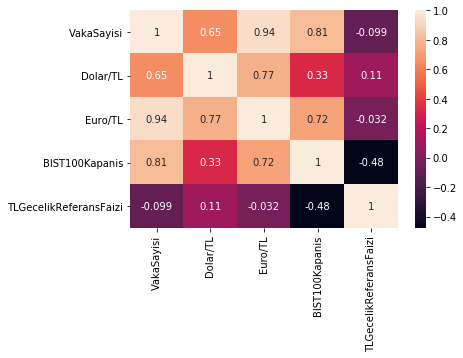

In [27]:
sns.heatmap(daily_case_corr, xticklabels=daily_case_corr.columns, yticklabels=daily_case_corr.columns, annot=True)

### Vefat & EVDS

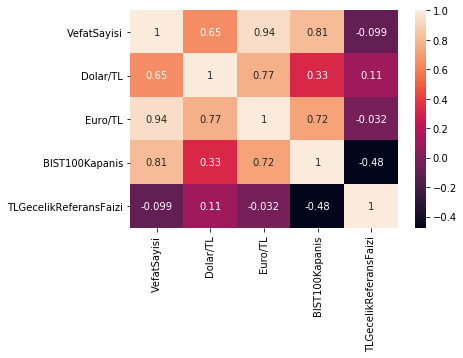

In [28]:
sns.heatmap(daily_death_corr, xticklabels=daily_death_corr.columns, yticklabels=daily_death_corr.columns, annot=True)

# Haftalık Verilerin Korelasyonu 

### Vaka & EVDS

In [29]:
weelky_case_corr = weekly_merged_case_data.corr(method="pearson") #Normal dağılmış veri için
#weelky_case_corr = weekly_merged_case_data.corr(method="spearman") #Normal dağılmamış veri için

weelky_case_corr

,VakaSayisi,AltinRezervi,KartHarcamaTutari,HaftalikKredi,ZiyaretciSayisi,TUFE,MerkeziYonetimButceGideri,KonutSatisi
VakaSayisi,1.000000,0.953133,0.617298,0.991646,-0.594059,0.970299,0.194979,0.674894
AltinRezervi,0.953133,1.000000,0.673037,0.957231,-0.526965,0.934822,0.362157,0.728564
KartHarcamaTutari,0.617298,0.673037,1.000000,0.600060,0.087361,0.676146,0.266054,0.874059
HaftalikKredi,0.991646,0.957231,0.600060,1.000000,-0.618998,0.965656,0.249496,0.665813
ZiyaretciSayisi,-0.594059,-0.526965,0.087361,-0.618998,1.000000,-0.560656,-0.180756,0.029094
TUFE,0.970299,0.934822,0.676146,0.965656,-0.560656,1.000000,0.231024,0.760530
MerkeziYonetimButceGideri,0.194979,0.362157,0.266054,0.249496,-0.180756,0.231024,1.000000,0.365703
KonutSatisi,0.674894,0.728564,0.874059,0.665813,0.029094,0.760530,0.365703,1.000000


### Vefat & EVDS

In [30]:
weelky_death_corr = weekly_merged_death_data.corr(method="pearson") #Normal dağılmış veri için
#weelky_death_corr = weekly_merged_death_data.corr(method="spearman") #Normal dağılmamış veri için

weelky_death_corr

,VefatSayisi,AltinRezervi,KartHarcamaTutari,HaftalikKredi,ZiyaretciSayisi,TUFE,MerkeziYonetimButceGideri,KonutSatisi
VefatSayisi,1.000000,0.931140,0.598891,0.980571,-0.588770,0.964939,0.114036,0.652335
AltinRezervi,0.931140,1.000000,0.673037,0.957231,-0.526965,0.934822,0.362157,0.728564
KartHarcamaTutari,0.598891,0.673037,1.000000,0.600060,0.087361,0.676146,0.266054,0.874059
HaftalikKredi,0.980571,0.957231,0.600060,1.000000,-0.618998,0.965656,0.249496,0.665813
ZiyaretciSayisi,-0.588770,-0.526965,0.087361,-0.618998,1.000000,-0.560656,-0.180756,0.029094
TUFE,0.964939,0.934822,0.676146,0.965656,-0.560656,1.000000,0.231024,0.760530
MerkeziYonetimButceGideri,0.114036,0.362157,0.266054,0.249496,-0.180756,0.231024,1.000000,0.365703
KonutSatisi,0.652335,0.728564,0.874059,0.665813,0.029094,0.760530,0.365703,1.000000


## Haftalık Veri Korelasyonunun Isı Haritası

### Vaka & EVDS

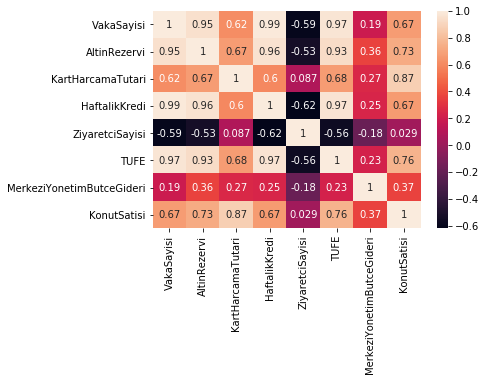

In [31]:
sns.heatmap(weelky_case_corr, xticklabels=weelky_case_corr.columns, yticklabels=weelky_case_corr.columns, annot=True)

### Vefat & EVDS

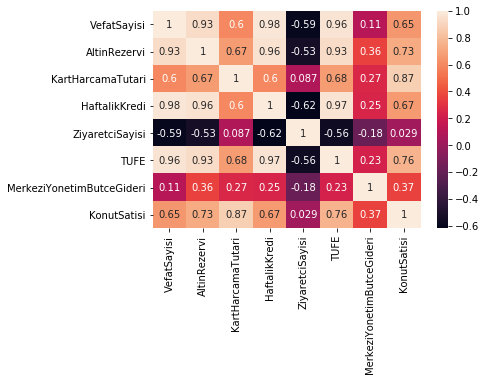

In [32]:
sns.heatmap(weelky_death_corr, xticklabels=weelky_death_corr.columns, yticklabels=weelky_death_corr.columns, annot=True)